In [120]:
install.packages("e1071", repos='http://cran.us.r-project.org')
library(e1071)

Warning message:
"package 'e1071' is in use and will not be installed"

In [121]:
predictions=function(y_probs, y, l1, l2, length, threshold=0.5){
    y_pred = rep(l1, length)
    y_pred[y_probs>threshold]=l2
return(y_pred)
}
class_error = function(cm){
    
    return((cm[2]+cm[3])/sum(cm))
}

## Problem 4

Generate a simulated two-class data set with 100 observations and
two features in which there is a visible but non-linear separation between the two classes. Show that in this setting, a support vector
machine with a polynomial kernel (with degree greater than 1) or a
radial kernel will outperform a support vector classifier on the training data. Which technique performs best on the test data? Make
plots and report training and test error rates in order to back up
your assertions.


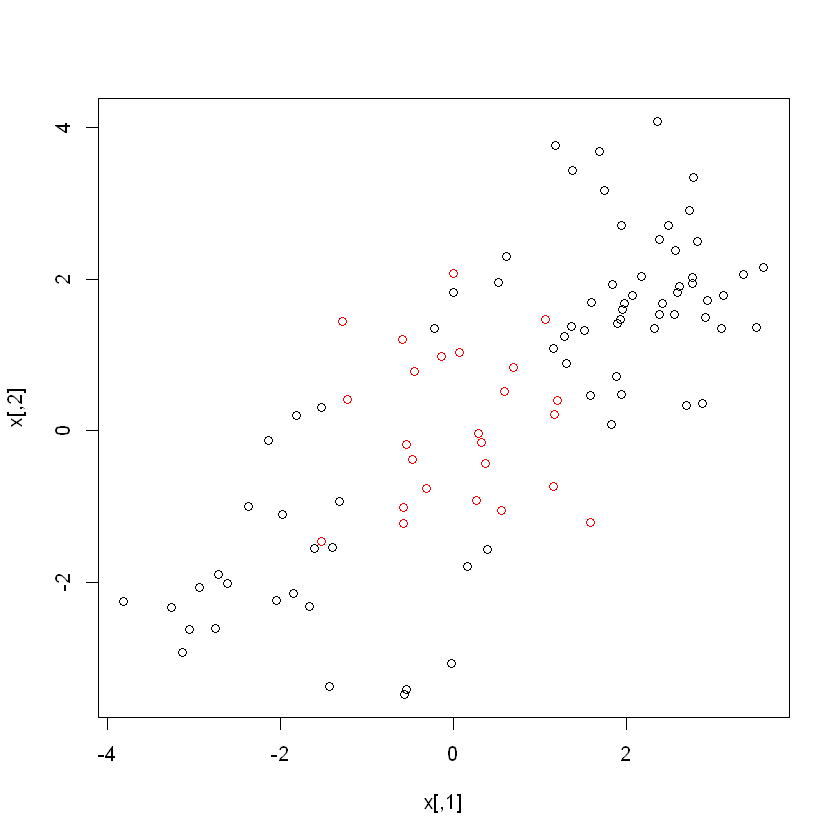

In [122]:
set.seed(1)
x=matrix(rnorm (100*2) , ncol=2)
x[1:50,]=x[1:50,]+2
x[51:75 ,]=x[51:75,]-2
y=c(rep(1,75) ,rep(2,25))
dat=data.frame(x=x,y=as.factor(y))
plot(x, col=y)

             x.1         x.2 y
1    1.373546189  1.37963332 1
2    2.183643324  2.04211587 1
3    1.164371388  1.08907835 1
4    3.595280802  2.15802877 1
5    2.329507772  1.34541536 1
6    1.179531616  3.76728727 1
7    2.487429052  2.71670748 1
8    2.738324705  2.91017423 1
9    2.575781352  2.38418536 1
10   1.694611613  3.68217608 1
11   3.511781168  1.36426355 1
12   2.389843236  1.53835527 1
13   1.378759419  3.43228224 1
14  -0.214699887  1.34930365 1
15   3.124930918  1.79261926 1
16   1.955066391  1.60719207 1
17   1.983809737  1.68000713 1
18   2.943836211  1.72088670 1
19   2.821221195  2.49418833 1
20   2.593901321  1.82266952 1
21   2.918977372  1.49404254 1
22   2.782136301  3.34303883 1
23   2.074564983  1.78542059 1
24   0.010648304  1.82044347 1
25   2.619825748  1.89980926 1
26   1.943871260  2.71266631 1
27   1.844204493  1.92643560 1
28   0.529247616  1.96236583 1
29   1.521849945  1.31833952 1
30   2.417941560  1.67572973 1
31   3.358679552  2.06016044 1
32   1.8

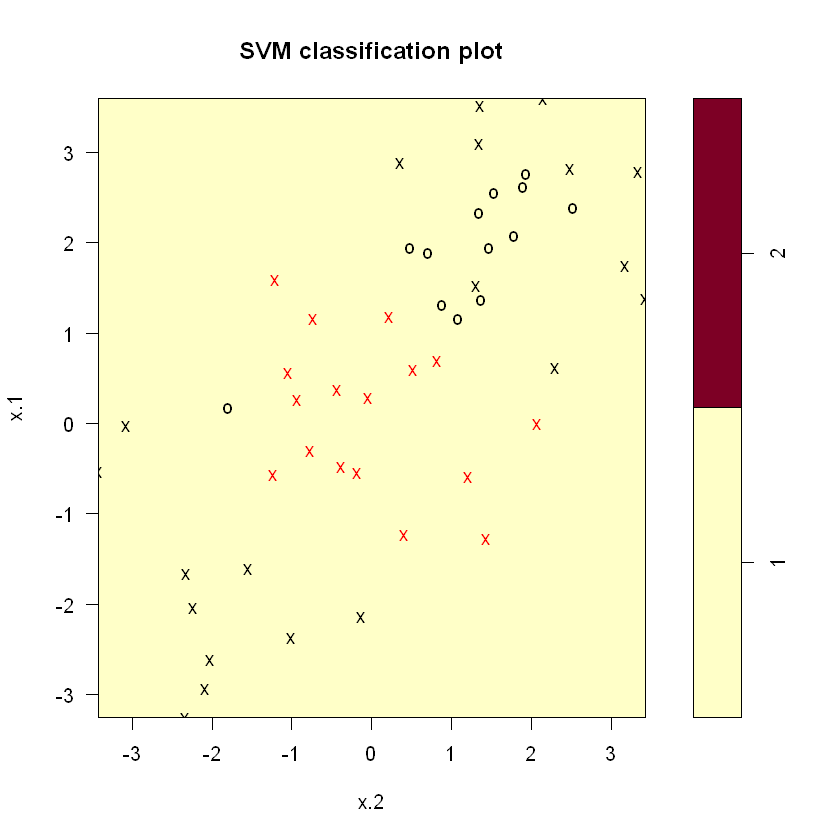

In [123]:
train=sample (100,50)
svmfit.lin=svm(y∼., data=dat[train,] , kernel ="linear", cost=1,
scale=FALSE)
plot(svmfit.lin , dat[train ,])
print(dat)

In [124]:
cm=table(predict = svmfit.lin$fitted, truth = dat[train,]$y)
cm

       truth
predict  1  2
      1 33 17
      2  0  0

In [125]:
errortrain.lin=class_error(cm)
errortrain.lin

[1] 0.34

In [126]:
lin.pred <- predict(svmfit.lin, dat[-train,])
cm=table(predict = lin.pred, truth = dat[-train,]$y)
cm

       truth
predict  1  2
      1 42  8
      2  0  0

In [127]:
errortest.lin=class_error(cm)
errortest.lin

[1] 0.16

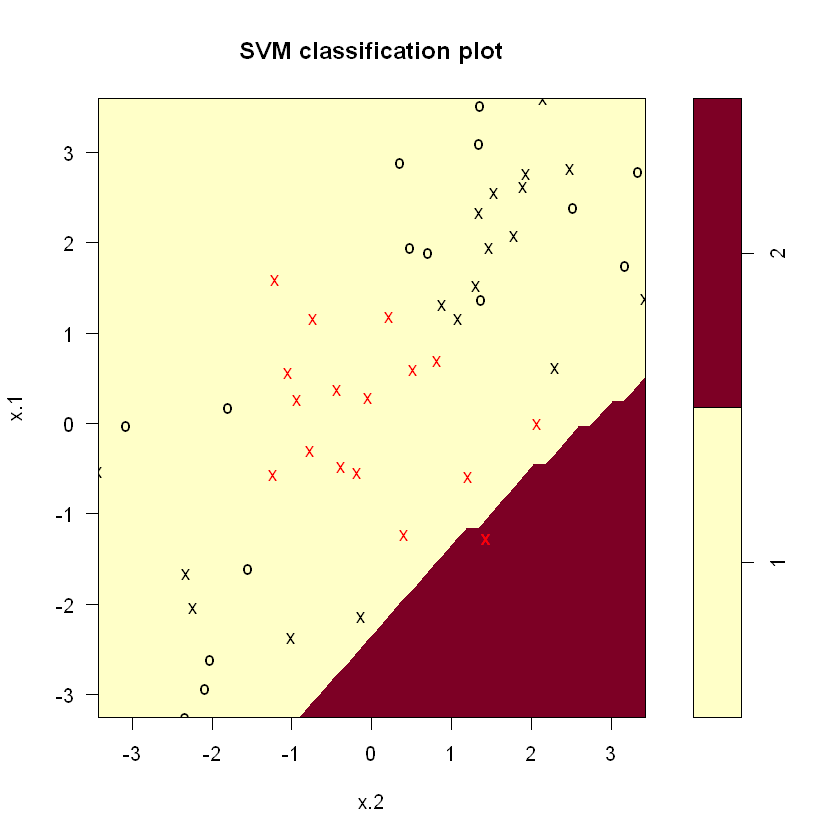

In [128]:
svmfit.pol=svm(y∼., data=dat[train,], kernel ="polynomial", gamma=1, cost=1)
plot(svmfit.pol , dat[train ,])

In [129]:
cm=table(predict = svmfit.pol$fitted, truth = dat[train,]$y)
cm

       truth
predict  1  2
      1 33 16
      2  0  1

In [130]:
errortrain.pol=class_error(cm)
errortrain.pol

[1] 0.32

In [131]:
pol.pred = predict(svmfit.pol, dat[-train,])
cm=table(predict = pol.pred, truth = dat[-train,]$y)
cm

       truth
predict  1  2
      1 42  8
      2  0  0

In [132]:
errortest.lin=class_error(cm)
errortest.lin

[1] 0.16

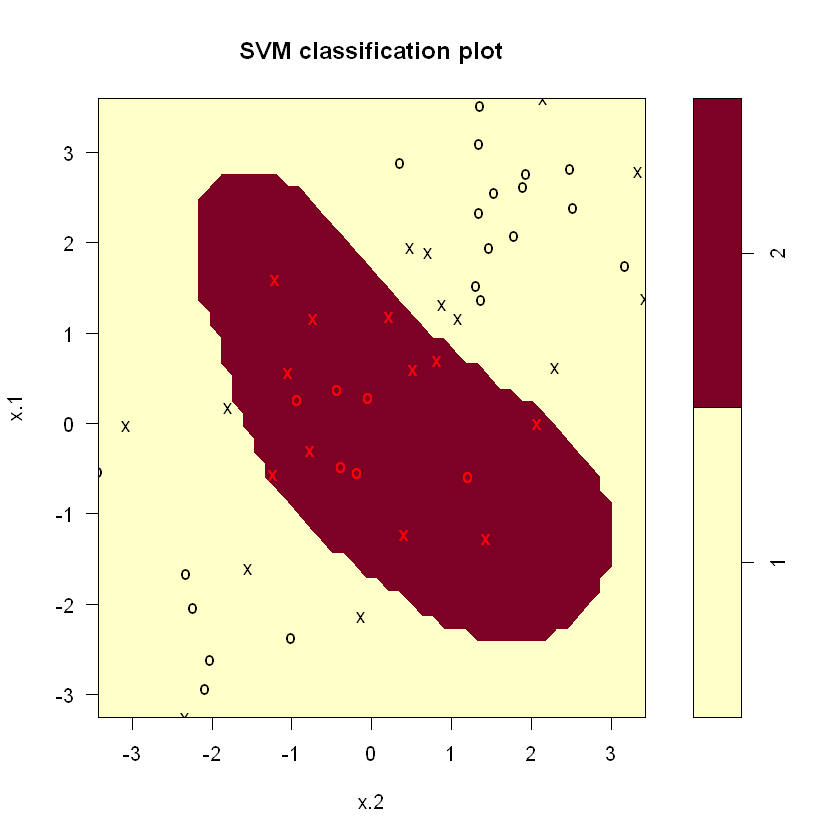

In [133]:
svmfit.rad=svm(y∼., data=dat[train ,], kernel ="radial", gamma=1, cost=1)
plot(svmfit.rad, dat[train ,])

In [134]:
cm=table(predict = svmfit.rad$fitted, truth = dat[train,]$y)
cm

       truth
predict  1  2
      1 33  0
      2  0 17

In [135]:
errortrain.rad=class_error(cm)
errortrain.rad

[1] 0

In [136]:
rad.pred = predict(svmfit.rad, dat[-train,])
cm=table(predict = rad.pred, truth = dat[-train,]$y)
cm

       truth
predict  1  2
      1 37  2
      2  5  6

In [137]:
errortest.rad=class_error(cm)
errortest.rad

[1] 0.14

The smallest errors are for radial kernel. 

## Problem 5

(a) Generate a data set with n = 500 and p = 2, such that the observations belong to two classes with a quadratic decision boundary
between them. 

In [138]:
x1=runif (500) -0.5
x2=runif (500) -0.5
y=1*(x1^2-x2^2 > 0)
df=data.frame(x1, x2, y=as.factor(y))

(b) Plot the observations, colored according to their class labels.
Your plot should display X1 on the x-axis, and X2 on the yaxis.

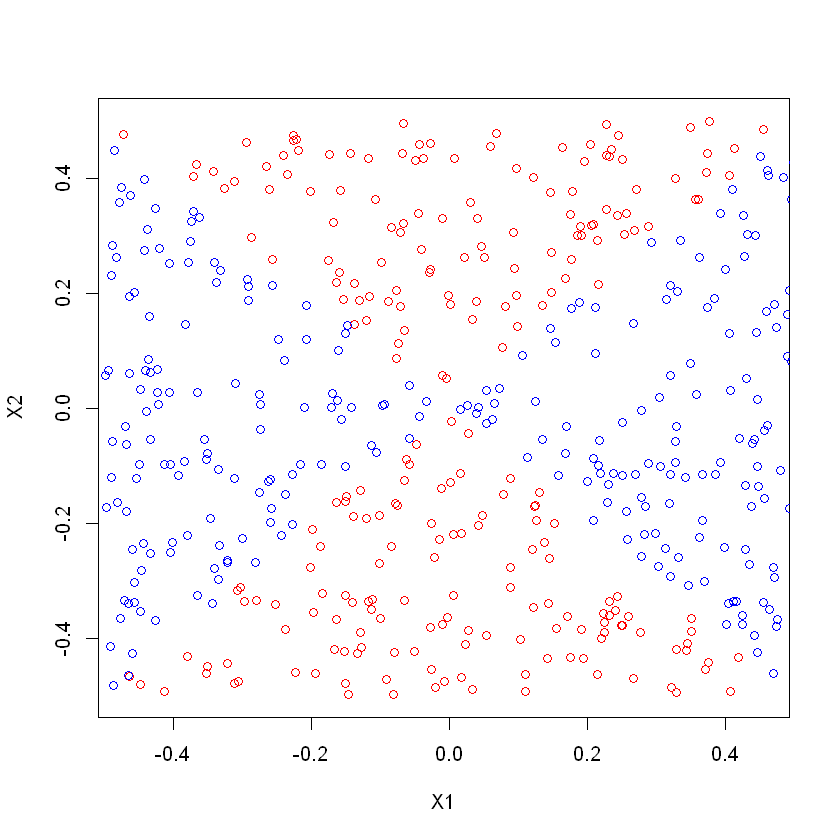

In [139]:
plot(x1[y == 0], x2[y == 0], col = "red", xlab = "X1", ylab = "X2")
points(x1[y == 1], x2[y == 1], col = "blue")

(c) Fit a logistic regression model to the data, using X1 and X2 as
predictors.

In [140]:
set.seed(1)
train=sample(1:500, 350)
df_tr = df[train,]
glm.fit = glm(y~., data = df, family=binomial)

(d) Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The
decision boundary should be linear

In [141]:
pred=predict(glm.fit, df, type="response")
y_pred=predictions(pred, df$y, 0, 1, 500)
cm=table(y_pred, df$y)
cm

      
y_pred   0   1
     0  66  74
     1 179 181

In [142]:
class_error(cm)

[1] 0.506

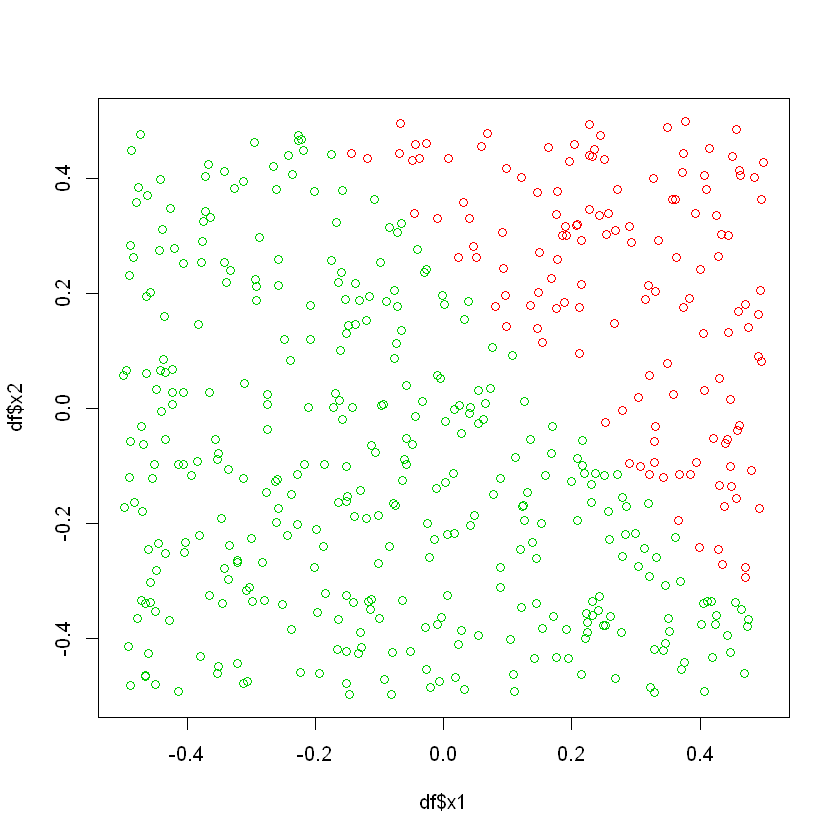

In [143]:
plot(df$x1, df$x2, col=y_pred+2)

(e) Now ﬁt a logistic regression model to the data using non-linear functions of X1 and X2 as predictors (e.g. $X_1^2$ , X1×X2, log(X2), and so forth)

In [144]:
set.seed(2)
glm.fit = glm(y~poly(x1,2)+x2, data = df_tr, family=binomial)

In [145]:
pred=predict(glm.fit, df_tr, type="response")
y_pred=predictions(pred, df_tr$y, 0, 1, 350)
cm=table(y_pred, df_tr$y)
cm

      
y_pred   0   1
     0 146  54
     1  31 119

In [146]:
class_error(cm)

[1] 0.2428571

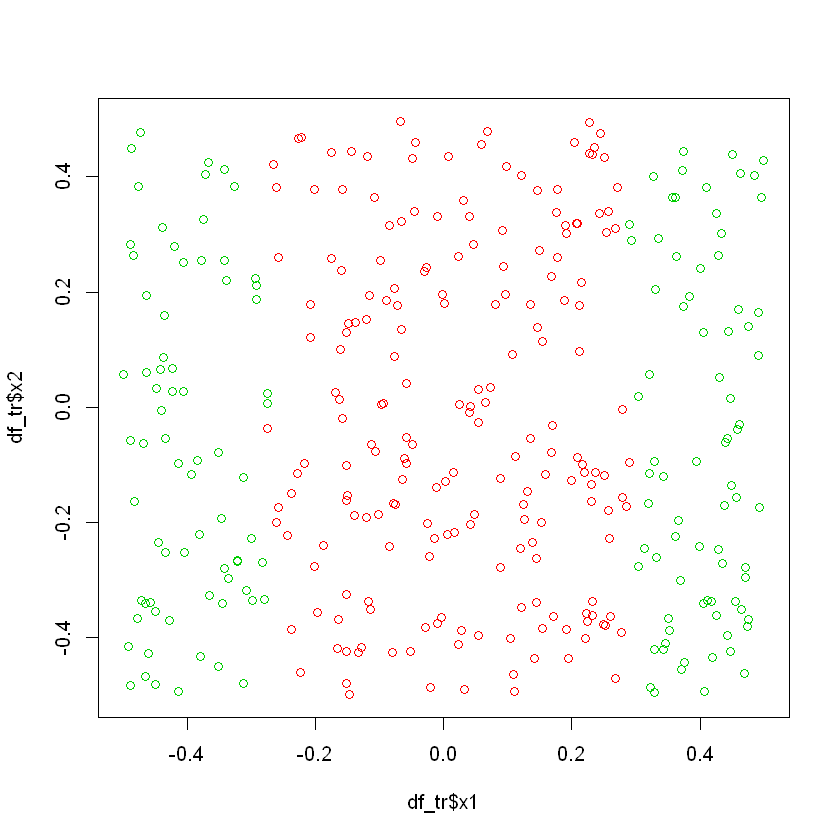

In [147]:
plot(df_tr$x1, df_tr$x2, col=y_pred+2)

In [148]:
set.seed(1)
glm.fit = glm(y~x1+x2+x2*x1, data = df_tr, family=binomial)

In [149]:
pred=predict(glm.fit, df, type="response")
y_pred=predictions(pred, df$y, 0, 1, 350)
cm=table(y_pred, df$y)
cm

      
y_pred   0   1
     0  98 137
     1 112  57

In [150]:
class_error(cm)

[1] 0.6163366

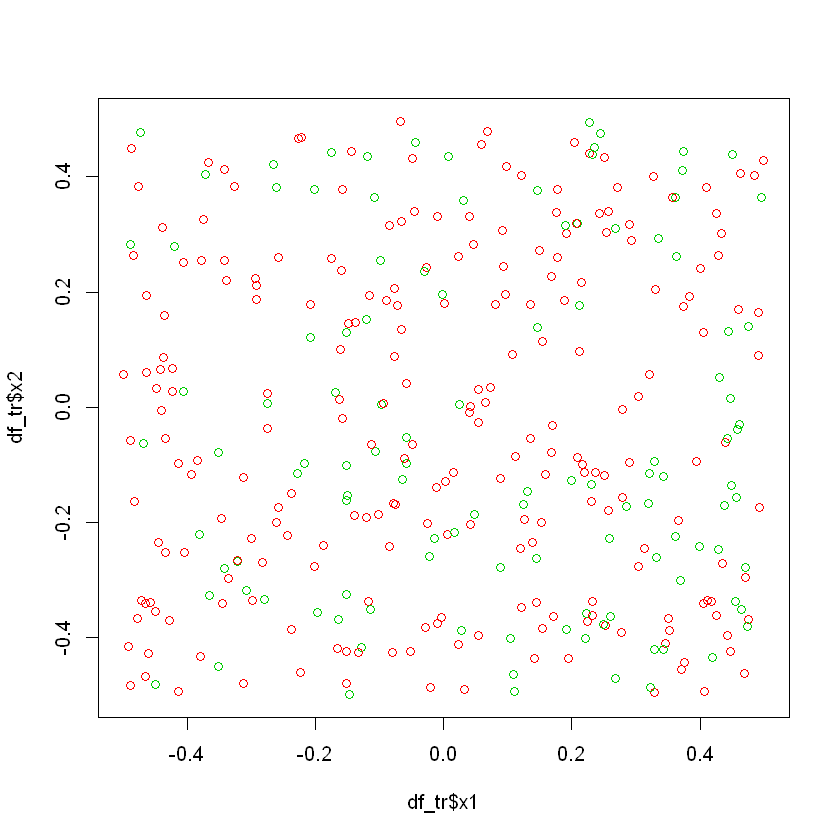

In [151]:
plot(df_tr$x1, df_tr$x2, col=y_pred+2)

(g) Fit a SVM using a non-linear kernel to the data. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.

In [152]:
df=data.frame(x=cbind(x1, x2), y=as.factor(y))

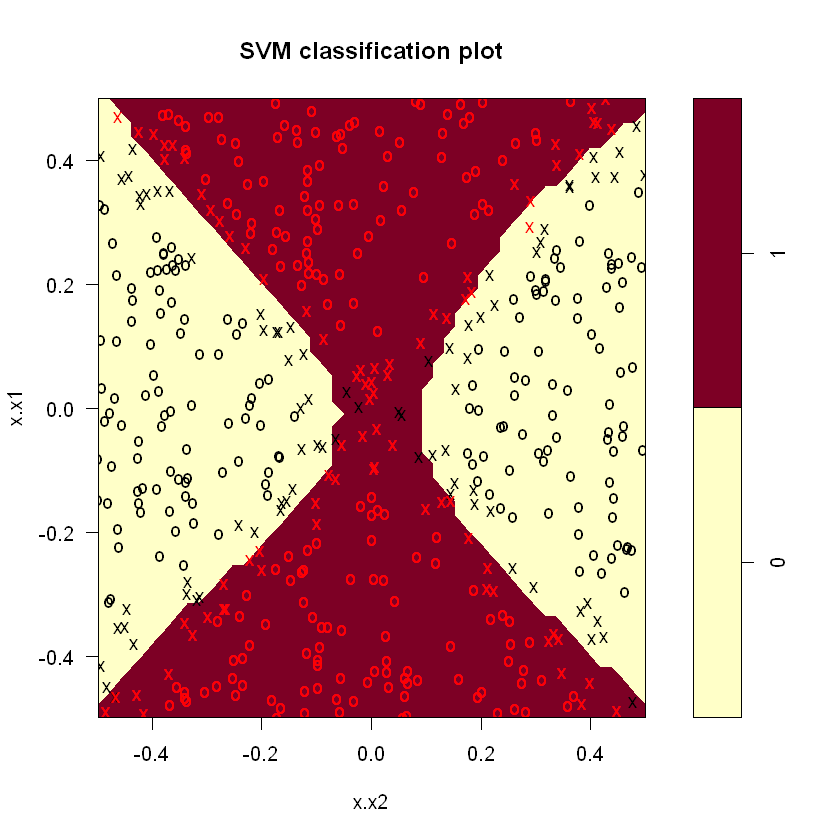

In [153]:
svm.fit = svm(y ~ ., data=df, kernel = 'radial', gamma = 1)
plot(svm.fit, data = df)

In [154]:
svm.pred = predict(svm.fit, data=df)
cm=table(predict = svm.fit$fitted, truth = df$y)
cm

       truth
predict   0   1
      0 229   1
      1  16 254

In [155]:
class_error(cm)

[1] 0.034